In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
import matplotlib.pyplot as plt
from scipy.io import arff
import seaborn as sns
import numpy as np

# Meet the data!

In [2]:
largeDataSet = './data/raw/KDDTrain.arff'
smallDataSet = './data/raw/KDDTrain_20Percent.arff'
testDataSet = './data/raw/KDDTest.arff'
smallTestDataSet = './data/raw/KDDTest-21.arff'

# Loading the .arff data format into a pandas dataframe
data, meta = arff.loadarff(largeDataSet)
df = pd.DataFrame(data)

test_data, test_deta = arff.loadarff(testDataSet)
test_df = pd.DataFrame(test_data)

pd.set_option('display.max_columns', None)

# Review of the dataset
df.head()
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,b'tcp',b'private',b'REJ',0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',229.0,10.0,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255.0,10.0,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,b'anomaly'
1,0.0,b'tcp',b'private',b'REJ',0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',136.0,1.0,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255.0,1.0,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,b'anomaly'
2,2.0,b'tcp',b'ftp_data',b'SF',12983.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',1.0,1.0,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134.0,86.0,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,b'normal'
3,0.0,b'icmp',b'eco_i',b'SF',20.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',1.0,65.0,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3.0,57.0,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,b'anomaly'
4,1.0,b'tcp',b'telnet',b'RSTO',0.0,15.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0',b'0',1.0,8.0,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29.0,86.0,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,b'anomaly'


In [3]:
# Print meta data
print(meta)

Dataset: 'KDDTrain'
	duration's type is numeric
	protocol_type's type is nominal, range is ('tcp', 'udp', 'icmp')
	service's type is nominal, range is ('aol', 'auth', 'bgp', 'courier', 'csnet_ns', 'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher', 'harvest', 'hostnames', 'http', 'http_2784', 'http_443', 'http_8001', 'imap4', 'IRC', 'iso_tsap', 'klogin', 'kshell', 'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm', 'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u', 'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private', 'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh', 'sunrpc', 'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i', 'time', 'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois', 'X11', 'Z39_50')
	flag's type is nominal, range is ('OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3', 'SF', 'SH')
	src_bytes's type is numeric
	dst_bytes's type is numeric

### Labels

In [4]:
# List all unique classes
print(df['class'].unique())

[b'normal' b'anomaly']


### Number of features and entries
* Includes the label column

In [5]:
# Train data
print("Number of features in train data", len(df.columns))
print("Number of entries in train data", len(df))

# Test data
print("Number of features in test data", len(test_df.columns))
print("Number of entries in test data", len(test_df))

Number of features in train data 42
Number of entries in train data 125973
Number of features in test data 42
Number of entries in test data 22544


So we have two mutual exclusive labels: 'normal' and 'anomaly'. This what we want to predict. 
In other words, this is the range of the labeling function and thus also the range of the predictor function!

This is therefore a classification problem.

### Types of features

In [6]:
print("Number of categorical features in the dataset", len(df.select_dtypes(include=['object']).columns))
print("Number of numerical features (floats and integers) in the dataset", len(df.select_dtypes(include=['float64', 'int64']).columns))

Number of categorical features in the dataset 8
Number of numerical features (floats and integers) in the dataset 34


# Pre-preprocessing

In [7]:
# Manually Checking if data include missing values
missingValues = df.isnull().sum()
print(f"Missing Values in every Column: \n{missingValues}")

Missing Values in every Column: 
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_r

No missing values. Imputation or feature elimination not required at this stage.

In [8]:
print(f"Descriptive Statistics: \n{df.describe(include='all')}")

Descriptive Statistics: 
            duration protocol_type  service    flag     src_bytes  \
count   125973.00000        125973   125973  125973  1.259730e+05   
unique           NaN             3       70      11           NaN   
top              NaN        b'tcp'  b'http'   b'SF'           NaN   
freq             NaN        102689    40338   74945           NaN   
mean       287.14465           NaN      NaN     NaN  4.556674e+04   
std       2604.51531           NaN      NaN     NaN  5.870331e+06   
min          0.00000           NaN      NaN     NaN  0.000000e+00   
25%          0.00000           NaN      NaN     NaN  0.000000e+00   
50%          0.00000           NaN      NaN     NaN  4.400000e+01   
75%          0.00000           NaN      NaN     NaN  2.760000e+02   
max      42908.00000           NaN      NaN     NaN  1.379964e+09   

           dst_bytes    land  wrong_fragment         urgent            hot  \
count   1.259730e+05  125973   125973.000000  125973.000000  125973.

Pay attention the means and standard deviations. They vary quite a lot feature to feature. We will some sort of scaling and outlier detection/elimination mechanism

In [9]:
# Dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  float64
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  float64
 5   dst_bytes                    125973 non-null  float64
 6   land                         125973 non-null  object 
 7   wrong_fragment               125973 non-null  float64
 8   urgent                       125973 non-null  float64
 9   hot                          125973 non-null  float64
 10  num_failed_logins            125973 non-null  float64
 11  logged_in                    125973 non-null  object 
 12  num_compromised              125973 non-null  float64
 13 

### Removing outliers

In [10]:
from scipy.stats import zscore

# A threshold value beyod which a data point is considered as an outlier
zscore_threshold = 3

# Calculate Z-scores for numeric columns (excluding categorical)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
z_scores = np.abs(zscore(df[numeric_columns]))

# Create a outlier mask indicating whether each row is an outlier or not
outlier_mask = np.any(z_scores > zscore_threshold, axis=1)

# Remove outliers from the dataset
df_original = df.copy()
df = df_original[~outlier_mask]

# Display the shape before and after removing outliers
print("Dataset Shape before removing outliers:", df_original.shape)
print("Dataset Shape after removing outliers:", df.shape)

Dataset Shape before removing outliers: (125973, 42)
Dataset Shape after removing outliers: (103446, 42)


# Data Preprocessing

### Encoding nominal features using one hot encoding
Most of our data is nominal with no obvious ordinality. We will use one hot encoding to encode these features as it provides the most robust solution.

In [11]:
# Step 1: One-Hot Encoding
# Concatenate training and test data to ensure consistent encoding
train_encoded = pd.get_dummies(df, columns=list(df.select_dtypes(include=['object']).columns))
test_encoded = pd.get_dummies(test_df, columns=list(df.select_dtypes(include=['object']).columns))

### Adding missing columns between test and train data
One of the problems with one hot encoding is that it creates new columns for each unique label for each feature. This changes the dimensions of the data. So, we need to make sure that the dimensions of the test and train data are the same. This is done by adding the missing columns to the test data.

In [12]:
print("Train data dimensions", train_encoded.shape)
print("Test data dimensions", test_encoded.shape)
# The numbers of the columns are not equal which is a problem.

Train data dimensions (103446, 123)
Test data dimensions (22544, 122)


In [13]:
all_columns = set(train_encoded.columns).union(set(test_encoded.columns))

for column in all_columns:
    if column not in train_encoded.columns:
        train_encoded[column] = 0
    if column not in test_encoded.columns:
        test_encoded[column] = 0

test_encoded = test_encoded.reindex(columns=train_encoded.columns, fill_value=0)

print(train_encoded.shape, test_encoded.shape)

(103446, 124) (22544, 124)


They now have the same dimensions!

### Visualizing the feature-feature and feature-labal correlation

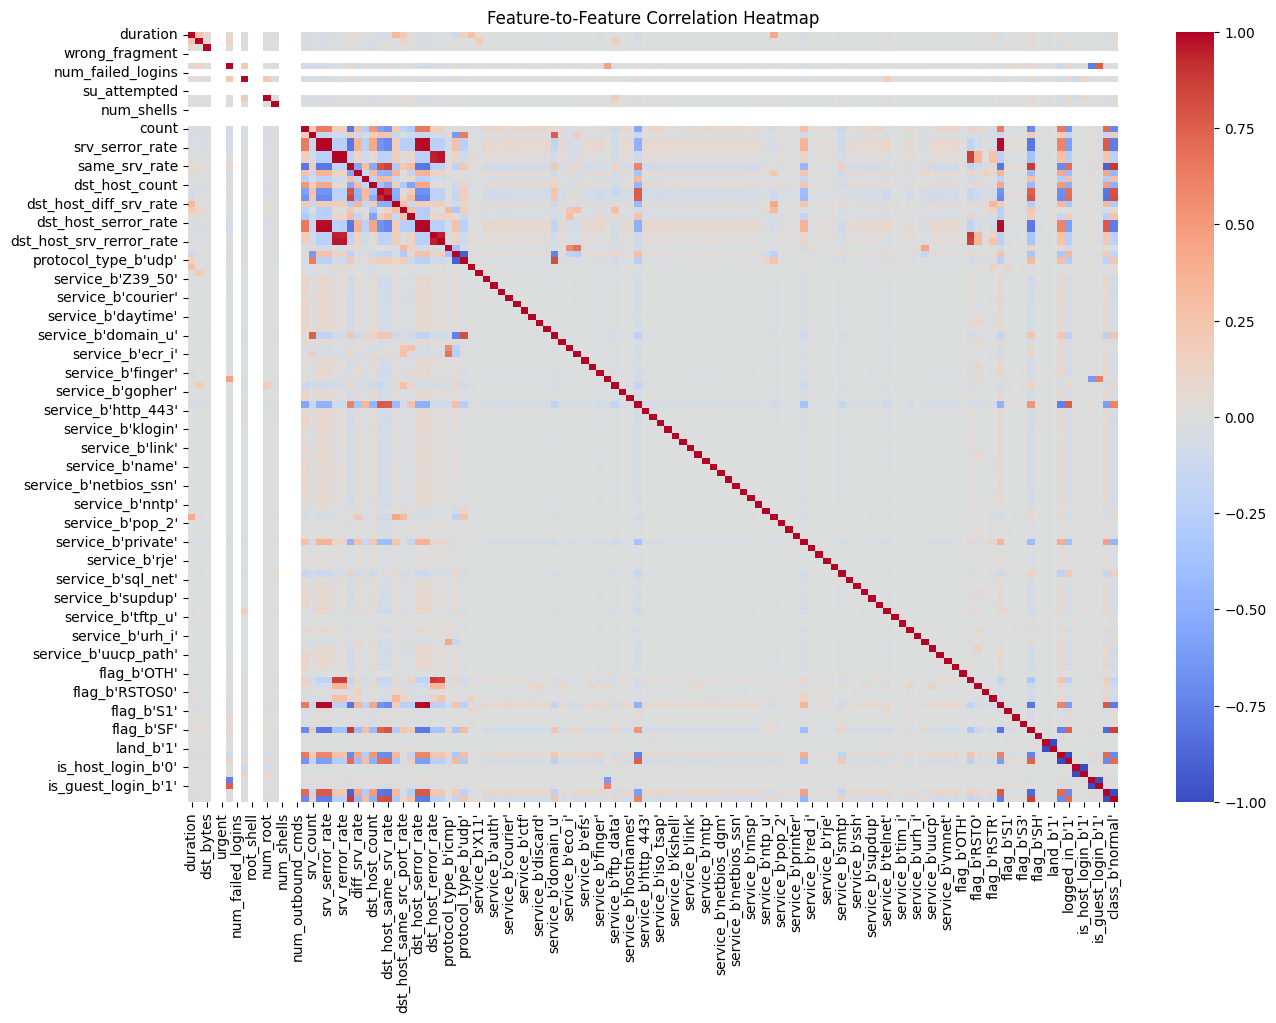

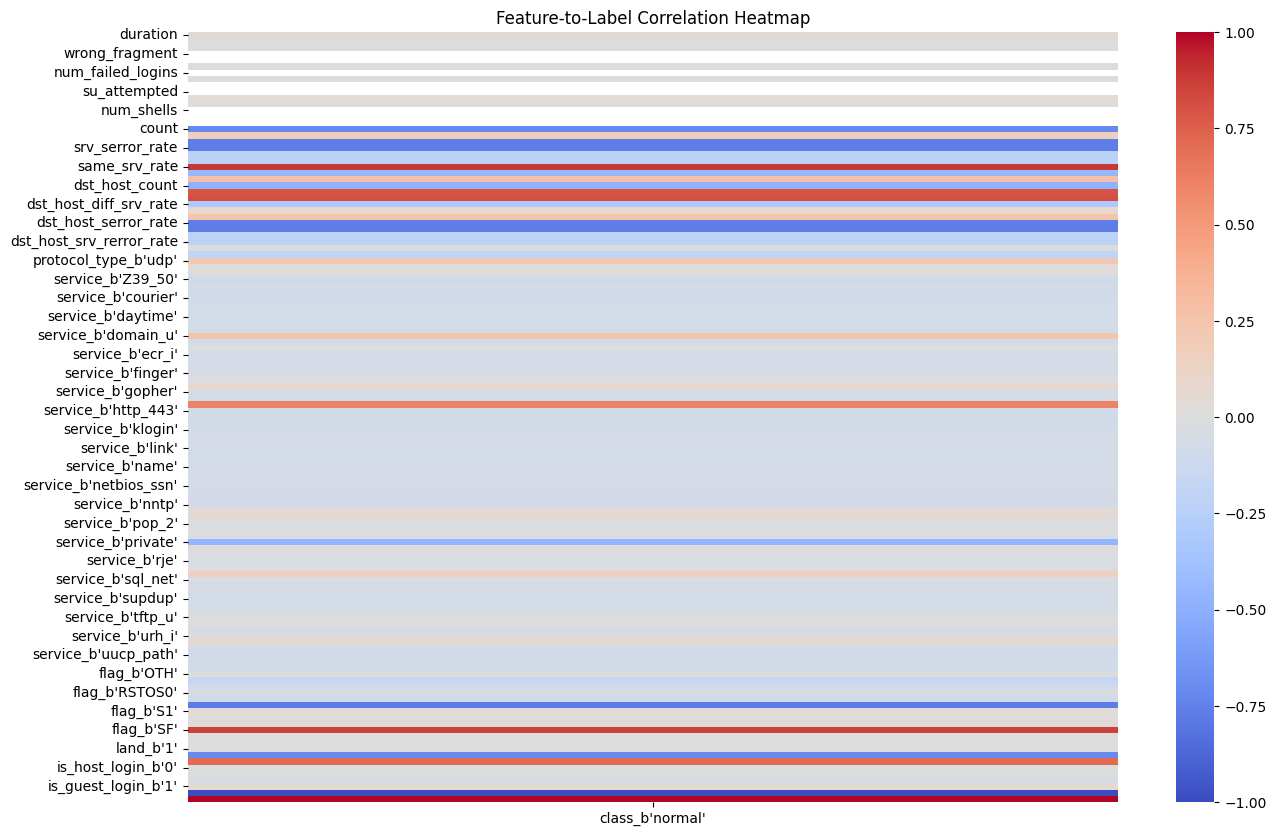

In [14]:
# Calculate correlation matrix for feature-to-feature and feature-to-label
feature_corr = train_encoded.iloc[:, :-1].corr()
label_corr = train_encoded.corr()["class_b'normal'"][:-1]

# Plot feature-to-feature correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(feature_corr, cmap='coolwarm', center=0, annot=False)
plt.title("Feature-to-Feature Correlation Heatmap")
plt.show()

# Plot feature-to-label correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(pd.DataFrame(label_corr), cmap='coolwarm', center=0, annot=False)
plt.title("Feature-to-Label Correlation Heatmap")
plt.show()

/home/naveed/Desktop/NIDS/.venv/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/naveed/Desktop/NIDS/.venv/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


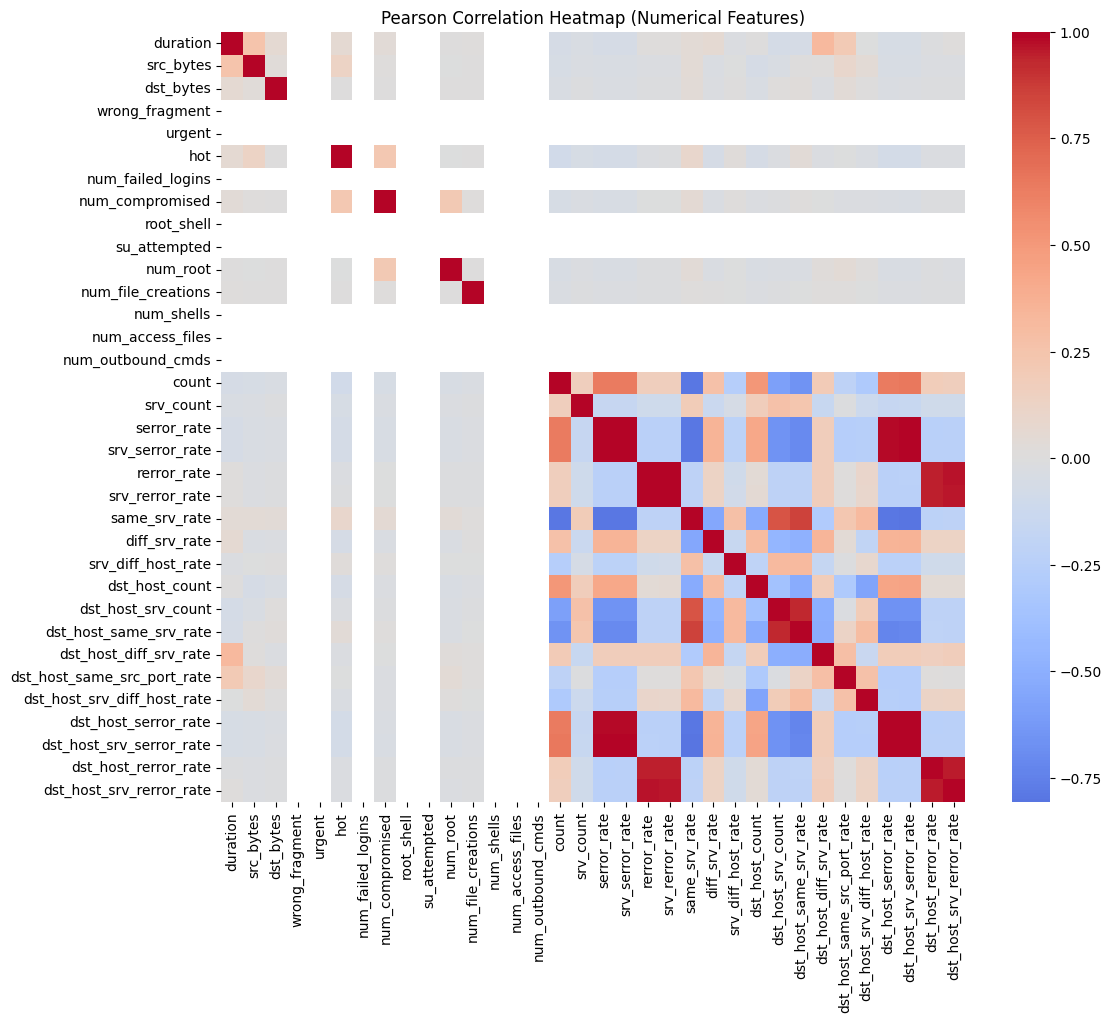

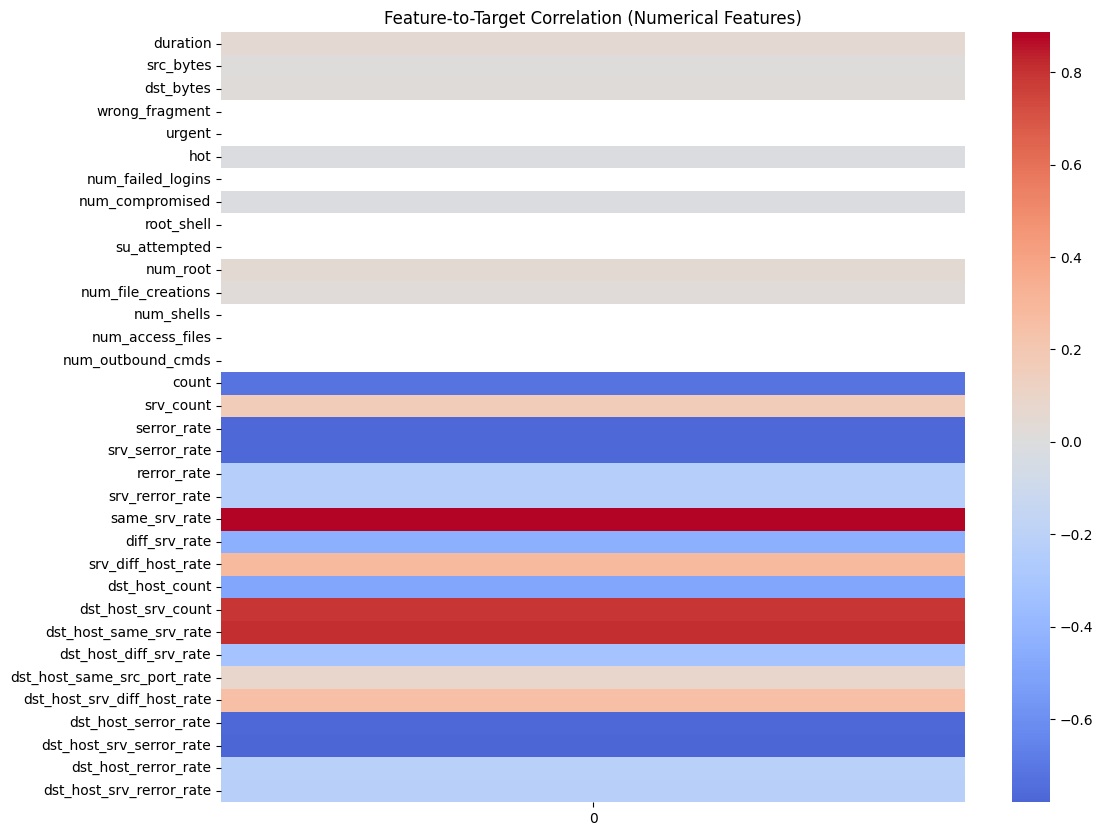

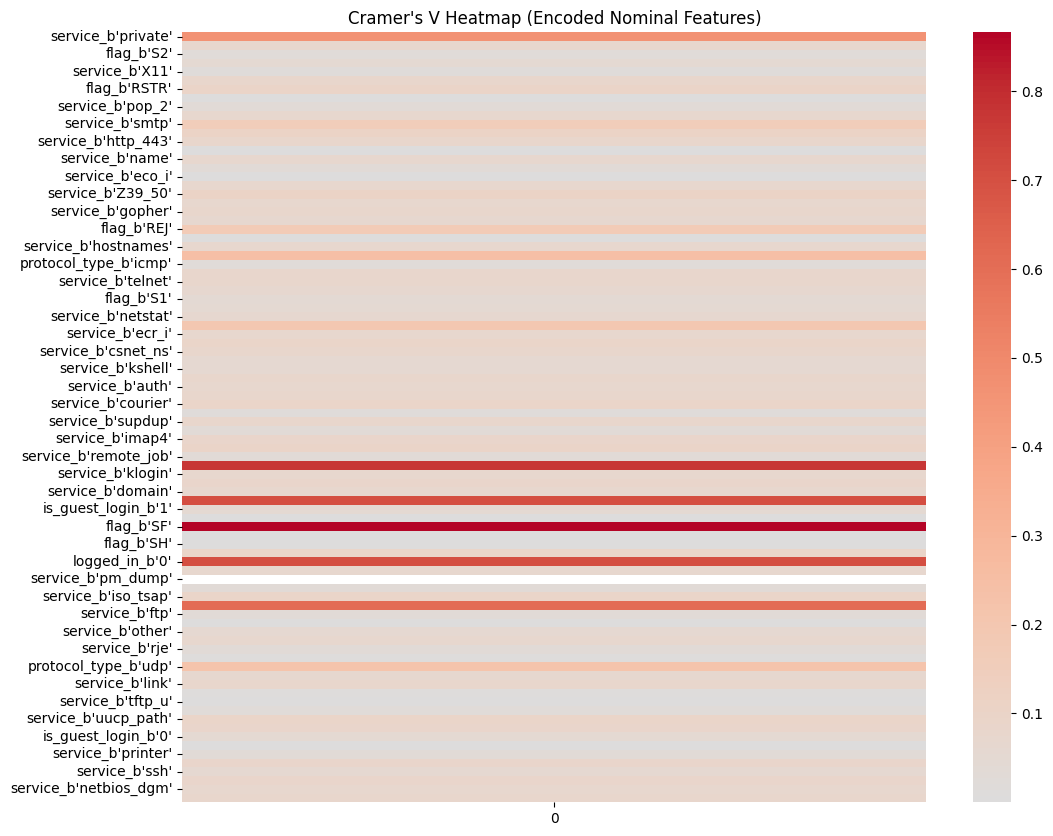

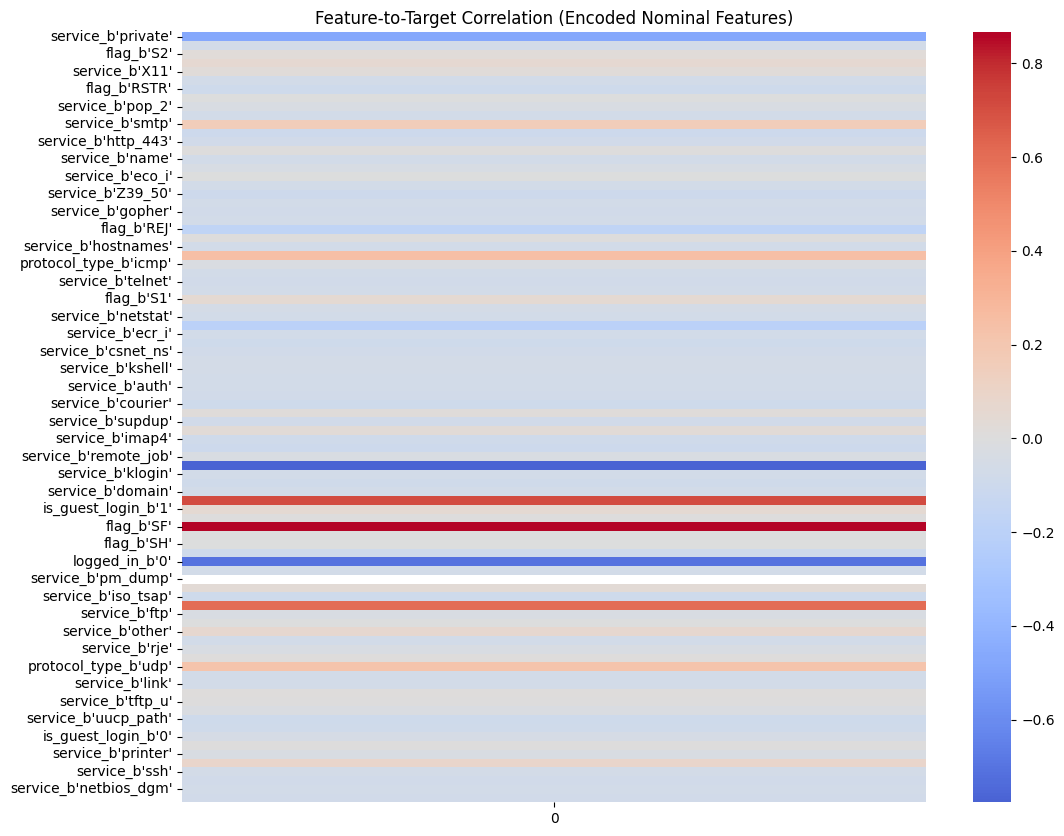

In [15]:
from scipy.stats import pointbiserialr

numerical_feature_names = list(df.select_dtypes(include=['float64', 'int64']).columns)
encoded_feature_names = list(set(train_encoded.columns) - set(numerical_feature_names) - {"class_b'normal'", "class_b'anomaly'"})

# Calculate Pearson correlation matrix for numerical features
numerical_corr = df[numerical_feature_names].corr()

# Calculate Cramer's V for encoded nominal features
encoded_corr = train_encoded[encoded_feature_names].apply(lambda x: np.sqrt(pointbiserialr(x, train_encoded["class_b'normal'"])[0]**2))

# Calculate correlation with target for numerical and encoded nominal features
numerical_target_corr = df[numerical_feature_names].apply(lambda x: x.corr(train_encoded["class_b'normal'"]))
encoded_target_corr = train_encoded[encoded_feature_names].apply(lambda x: pointbiserialr(x, train_encoded["class_b'normal'"])[0])

# Plot Pearson correlation heatmap for numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_corr, cmap='coolwarm', center=0, annot=False)
plt.title("Pearson Correlation Heatmap (Numerical Features)")
plt.show()

# Plot feature-to-target correlation heatmap for numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(pd.DataFrame(numerical_target_corr), cmap='coolwarm', center=0, annot=False)
plt.title("Feature-to-Target Correlation (Numerical Features)")
plt.show()

# Plot Cramer's V heatmap for encoded nominal features
plt.figure(figsize=(12, 10))
sns.heatmap(pd.DataFrame(encoded_corr), cmap='coolwarm', center=0, annot=False)
plt.title("Cramer's V Heatmap (Encoded Nominal Features)")
plt.show()

# Plot feature-to-target correlation heatmap for encoded nominal features
plt.figure(figsize=(12, 10))
sns.heatmap(pd.DataFrame(encoded_target_corr), cmap='coolwarm', center=0, annot=False)
plt.title("Feature-to-Target Correlation (Encoded Nominal Features)")
plt.show()

So we have done a few things here:
* First of all, the reason we have computed feature-feature correlation and feature to label correlation separately is because we want to see if there are any features that are highly correlated with each other. If there are, we can drop one of them as it will not add any new information to the model. On the contrary, values that are highly correlated to the label are good candidates for the predictor function.
* We found out that using Pearson's correlation coefficient is not a good idea for nominal encoded data. We confirmed this by initially using Pearson's coefficient for plot a heatmap where nominal values consistently yielded weak correlation coeffients. We then switched to Camer's V correlation coefficient (found after a lot of googling) which is more suited to encoded nominal data.
* The resultant four heatmaps show that a lot of numerical features are highly correlated which means we can drop one from each. Many also have very weak correlation with the label. We will drop these as well. We will also drop the features that have very weak correlation with the label.
* For nominal features, we can see that there are a lot of features that have very weak correlation with the label. We will drop these as well.


* Also, num_outbound_cmds is a very bad feature overall.

# Feature Selection

### Dropping weak correlations between feature-label

In [16]:
# Set correlation threshold for feature selection
correlation_threshold = 0.2  # Adjust this threshold as needed

# Drop numerical features with weak correlation
selected_numerical_features = df[numerical_feature_names].columns[numerical_target_corr.abs() >= correlation_threshold]

# Drop encoded nominal features with weak correlation
selected_encoded_features = train_encoded[encoded_feature_names].columns[encoded_target_corr.abs() >= correlation_threshold]

# Combine selected features
selected_features = selected_numerical_features.tolist() + selected_encoded_features.tolist()

print(selected_features)

['count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', "service_b'private'", "service_b'domain_u'", "flag_b'S0'", "logged_in_b'1'", "flag_b'SF'", "logged_in_b'0'", "service_b'http'", "protocol_type_b'udp'"]


### Dropping strong correlations between feature-feature
This is because they impart the similar information to the model.

In [17]:
selected_df = train_encoded[selected_features]

# Calculate correlation matrix for selected features
selected_corr_matrix = selected_df[selected_features].corr()

# Find pairs of strongly correlated features
correlated_pairs = []
for i in range(len(selected_features)):
    for j in range(i + 1, len(selected_features)):
        if selected_corr_matrix.iloc[i, j] >= 0.8:  # Adjust this threshold as needed
            correlated_pairs.append((selected_features[i], selected_features[j]))

# Drop one feature from each correlated pair
features_to_drop = set()
for feature1, feature2 in correlated_pairs:
    features_to_drop.add(feature2)

# Final list of non-correlated selected features
final_selected_features = [feature for feature in selected_features if feature not in features_to_drop]

print("Final Selected Features:")
print(len(final_selected_features))

Final Selected Features:
15


### Preparing for scaling

In [18]:
train_encoded_selected = train_encoded[selected_features + ["class_b'normal'"]]
test_encoded_selected = test_encoded[selected_features + ["class_b'normal'"]]
test_encoded = test_encoded.reindex(columns=train_encoded.columns, fill_value=0)

print(train_encoded_selected.shape, test_encoded_selected.shape)

(103446, 26) (22544, 26)


Data prepared for scaling.

# Feature Scaling

### Scaling the encoded values using robust scaler

In [19]:
# Apply Robust Scaling to features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(train_encoded_selected)
X_test_scaled = scaler.transform(test_encoded_selected)

# Convert scaled arrays back to DataFrames
X_train_scaled_and_encoded = pd.DataFrame(X_train_scaled, columns=train_encoded_selected.columns)
X_test_scaled_and_encoded = pd.DataFrame(X_test_scaled, columns=test_encoded_selected.columns)
X_test_scaled_and_encoded.head()

,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,service_b'private',service_b'domain_u',flag_b'S0',logged_in_b'1',flag_b'SF',logged_in_b'0',service_b'http',protocol_type_b'udp',class_b'normal'
0,0.536300,0.0,0.00,1.0,1.0,0.04,0.1,0.000000,1.000000,0.039216,0.04,0.093750,0.000000,0.0,0.0,1.00,1.00,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.318501,0.0,0.00,1.0,1.0,0.01,0.1,0.000000,1.000000,0.003922,0.00,0.093750,0.000000,0.0,0.0,1.00,1.00,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.002342,0.0,0.00,0.0,0.0,1.00,0.0,0.000000,0.525490,0.337255,0.61,0.062500,0.054054,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.002342,0.0,0.00,0.0,0.0,1.00,0.0,1.204819,0.011765,0.223529,1.00,0.000000,0.756757,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.002342,0.0,0.12,1.0,0.5,1.00,0.0,0.903614,0.113725,0.337255,0.31,0.265625,0.054054,0.0,0.0,0.83,0.71,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# KNN Classifier

In [20]:
# Prepare the data for training and testing
X_train = X_train_scaled_and_encoded.drop(columns=["class_b'normal'"])
y_train = X_train_scaled_and_encoded[["class_b'normal'"]]
X_test = X_test_scaled_and_encoded.drop(columns=["class_b'normal'"])
y_test = X_test_scaled_and_encoded[["class_b'normal'"]]

k = 2  # You can choose an appropriate value for k
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

/home/naveed/Desktop/NIDS/.venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 76.22427253371185
